In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid"); sns.set_palette("muted")
import numpy as np; np.random.seed(42)
import pandas as pd
import sklearn.preprocessing as pre
from scipy import stats

In [2]:
df = pd.read_csv("../datasets/processed/yeast/yeast_prep.csv")

#Yeast

Sequence name is skipped here!
1. Sequence Name: Accession number for the SWISS-PROT database 
2. mcg: McGeoch's method for signal sequence recognition. 
3. gvh: von Heijne's method for signal sequence recognition. 
4. alm: Score of the ALOM membrane spanning region prediction program. 
5. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins. 
6. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute. 
7. pox: Peroxisomal targeting signal in the C-terminus. 
8. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins. 
9. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.
10. category: cellular localization sites of proteins; already transformed to numerical values.

In [3]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,category
0,0.58,0.61,0.47,0.13,0.5,0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0,0.48,0.22,6


In [4]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,category
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199,4.126011
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491,3.037575
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000,0.000000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000,5.000000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000,9.000000


In [5]:
def autoCox(name, X, y):
    data_trans = stats.boxcox(X + 10e-1)
    
    data_scaled = data_trans[0].reshape(-1,1)
    scaler = pre.MinMaxScaler()
    data_scaled = scaler.fit_transform(data_scaled)

    fig = plt.figure(figsize=(14, 7))
    f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=False)
    
    sns.distplot(X, ax=axes[0][0], axlabel="")
    axes[0][0].set_title("raw data for " + name)

    axes[0][1].scatter(X,y)
    
    sns.distplot(data_scaled, ax=axes[1][0], label="")
    axes[1][0].set_title(u"λ = " + str(data_trans[1]))
    axes[1][1].scatter(data_scaled, y)

Error whilst processing erl: cannot convert float infinity to integer
Error whilst processing pox: cannot convert float infinity to integer


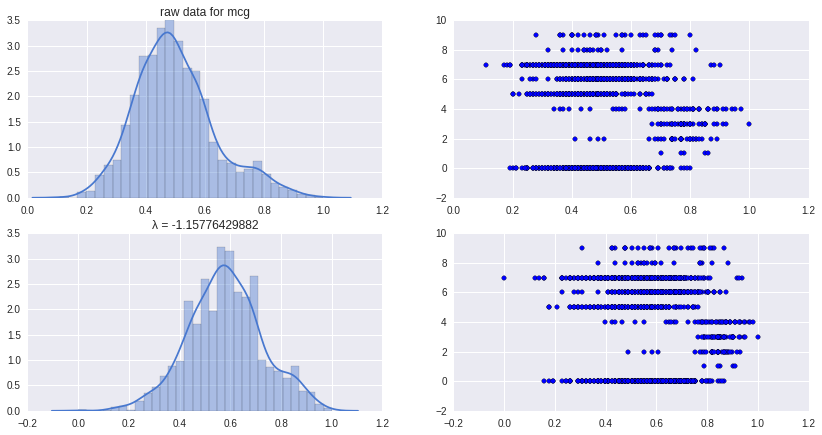

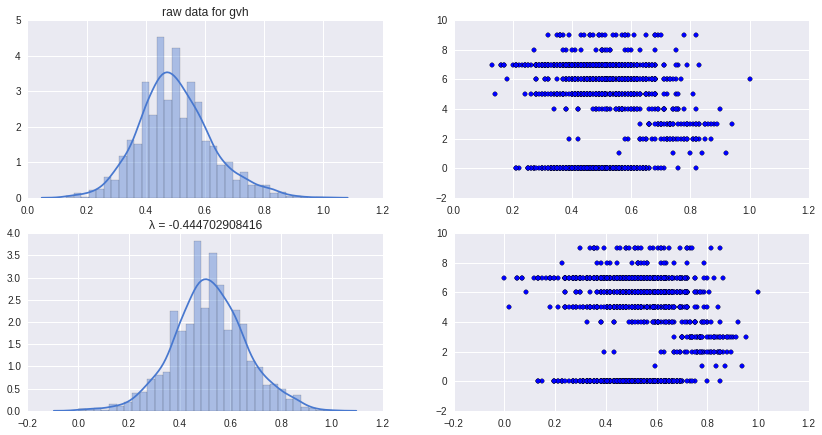

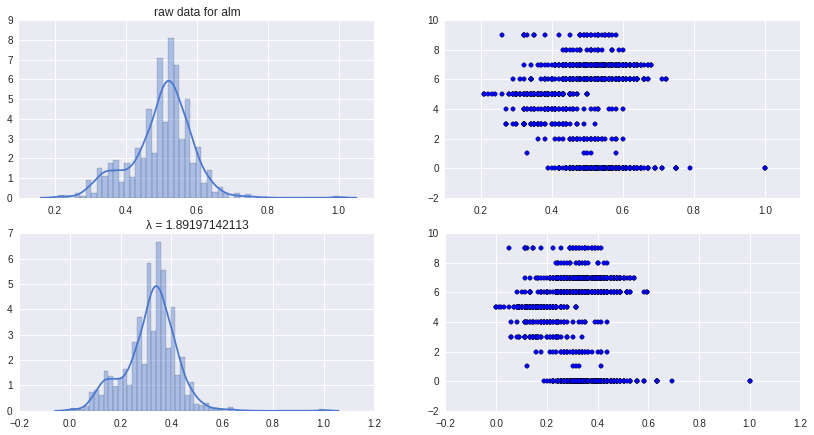

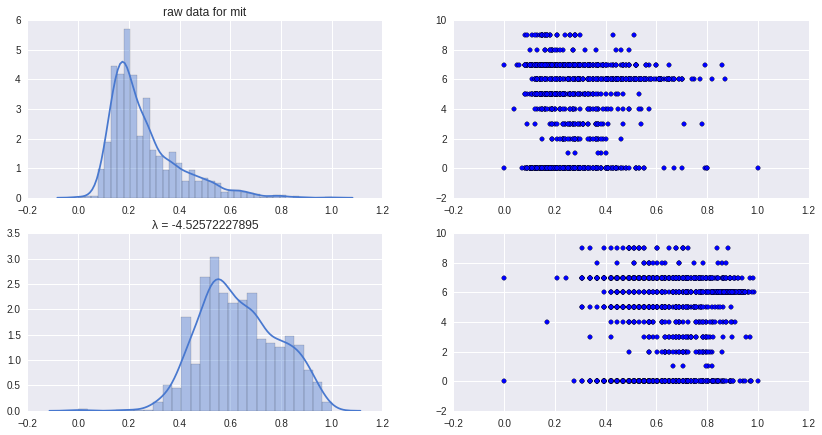

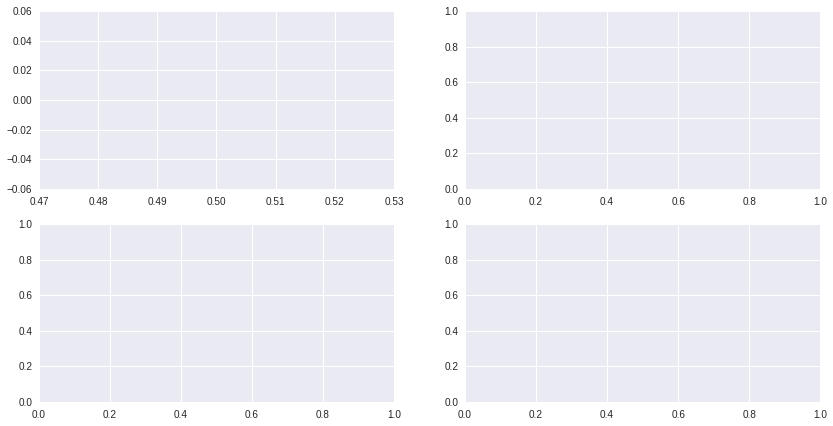

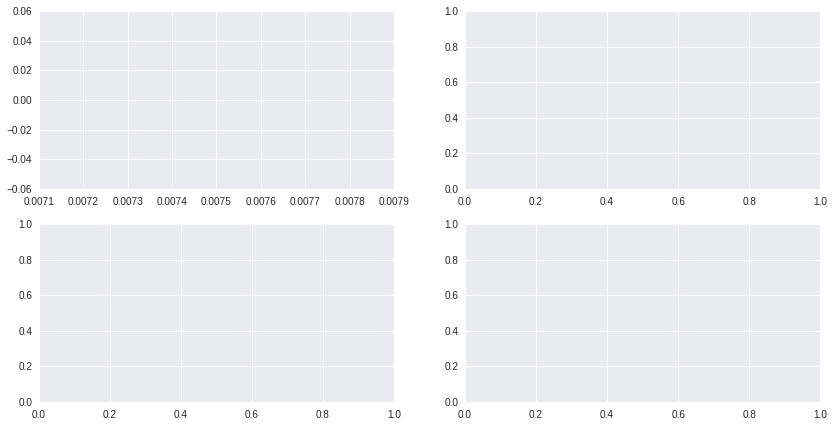

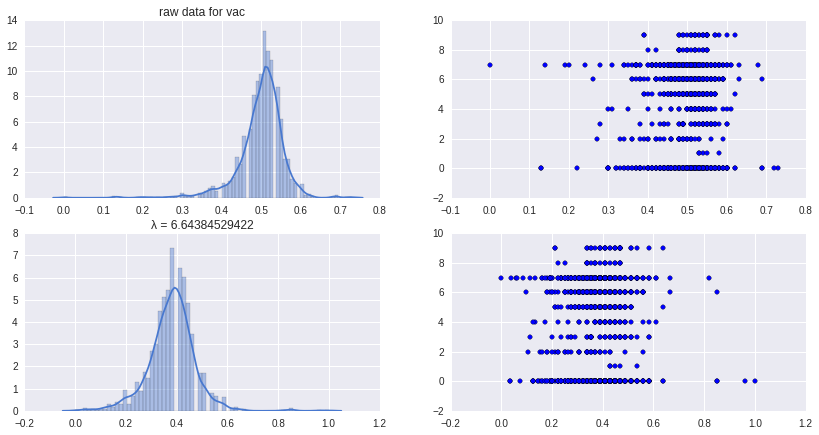

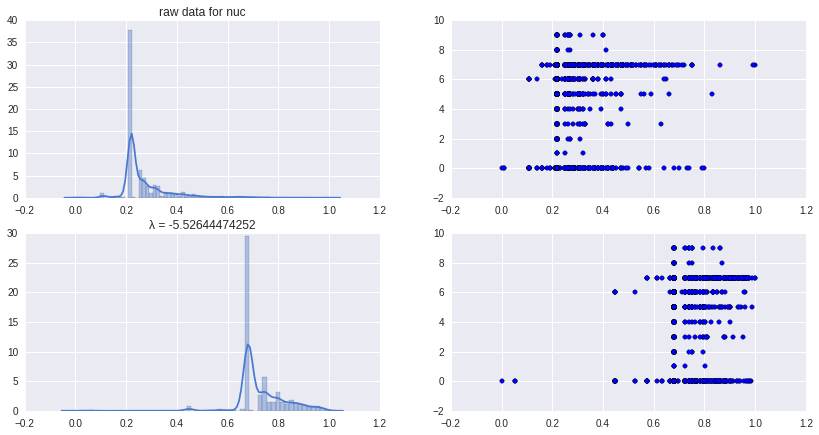

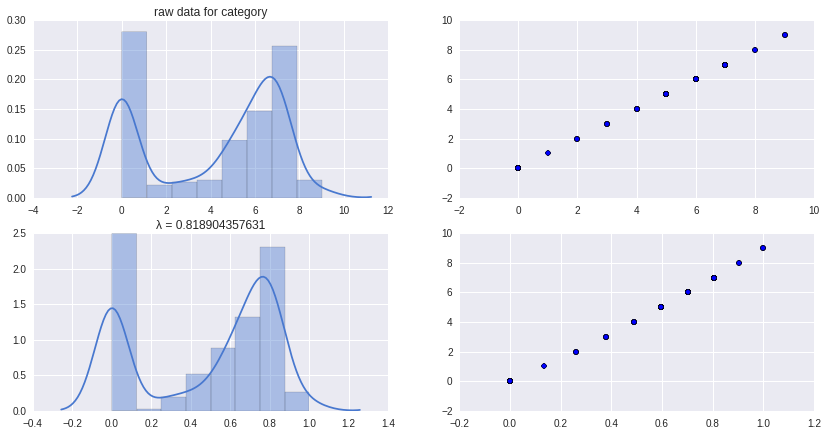

In [6]:
for x in df:
    try:
        autoCox(str(x), df[x], df['category'])
    except Exception, e:
        print "Error whilst processing {}: {}".format(x, e) 